In [1]:
import random
import statistics
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

In [2]:
def flip_coin():
    flip = random.random()
    if flip > 0.5:
        return 'H'
    else:
        return 'T'
        

In [3]:
def simulation(n = 16):
    count = 0
    head_count = 0
    tail_count = 0
    heads = []
    tails = []
    while count < 2 ** n:
        flip = flip_coin()
        if flip == "H":
            head_count += 1
        elif flip == "T":
            tail_count += 1
        
        count += 1
        for i in range(n + 1):
            if count == 2 ** i:
                heads.append(head_count)
                tails.append(tail_count)
    return heads, tails
            
            

In [4]:
H, T = simulation()


In [5]:
diff = [H[i] - T[i] for i in range(len(H))]

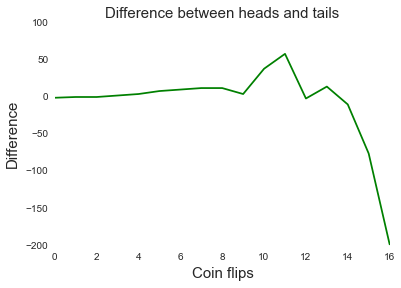

In [6]:
y1 = diff
plt.plot(y1, color="green")
plt.xlabel("Coin flips", fontsize=15)
plt.ylabel("Difference", fontsize=15)
plt.title("Difference between heads and tails", fontsize=15)
plt.show()

In [7]:
def ratio(a, b):
    ratio = []
    for i in range(len(a)):
        if b[i] != 0:
            ratio.append(a[i]/b[i])
        else:
            ratio.append(0)
    return ratio

In [8]:
ratio = ratio(H, T)

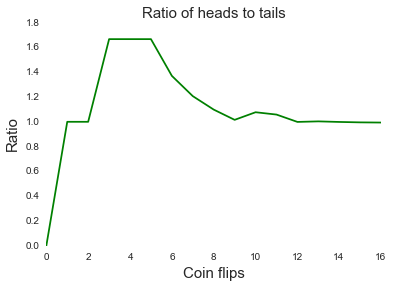

In [9]:
y1 = ratio
plt.plot(y1, color="green")
plt.xlabel("Coin flips", fontsize=15)
plt.ylabel("Ratio", fontsize=15)
plt.title("Ratio of heads to tails", fontsize=15)
plt.show()

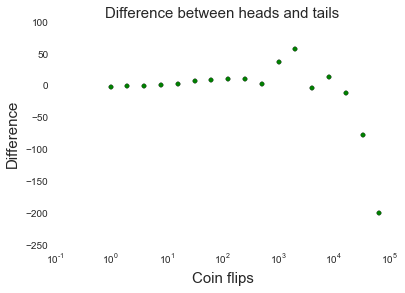

In [10]:
y1 = diff
x1 = [2**n for n in range(17)]
plt.scatter(x1,y1, c="green")
plt.xscale('log')
plt.xlabel("Coin flips", fontsize=15)
plt.ylabel("Difference", fontsize=15)
plt.title("Difference between heads and tails", fontsize=15)
plt.show()

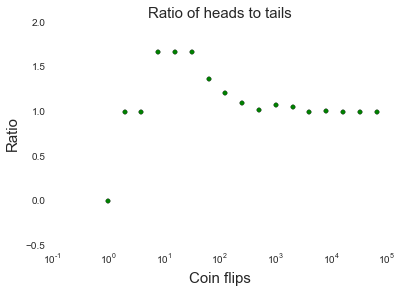

In [11]:
y1 = ratio
x1 = [2**n for n in range(17)]
plt.scatter(x1,y1, c="green")
plt.xscale('log')
plt.xlabel("Coin flips", fontsize=15)
plt.ylabel("Ratio", fontsize=15)
plt.title("Ratio of heads to tails", fontsize=15)
plt.show()

In [12]:
def sim_20():
    ratio20 = []
    for i in range(20):
        my_list = []
        H, T = simulation()
        for j in range(len(H)):
            if T[j] != 0:
                my_list.append(H[j] / T[j])
            else:
                my_list.append(0)
        ratio20.append(my_list)
    return ratio20

ratio20 = sim_20()

In [13]:
def find_mean(x):
    mean = []
    for i in range(len(x[0])):
        my_list = []
        for j in range(len(x)):
            my_list.append(x[j][i])
        mean.append(statistics.mean(my_list))
    return mean
        
    

In [14]:
mean = find_mean(ratio20)

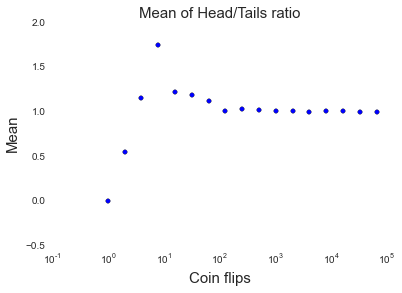

In [15]:
y1 = mean
x1 = [2**n for n in range(17)]
plt.scatter(x1,y1)
plt.xscale('log')
plt.xlabel("Coin flips", fontsize=15)
plt.ylabel("Mean", fontsize=15)
plt.title("Mean of Head/Tails ratio", fontsize=15)
plt.show()

In [16]:
def find_stdev(x):
    stdev = []
    for i in range(len(x[0])):
        my_list = []
        for j in range(len(x)):
            my_list.append(x[j][i])
        stdev.append(statistics.stdev(my_list))
    return stdev

In [17]:
stdev = find_stdev(ratio20)

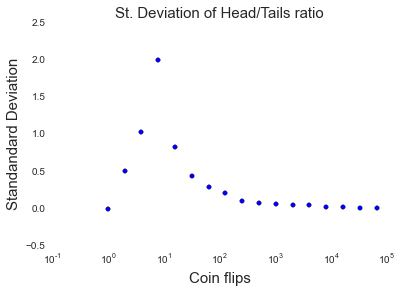

In [18]:
y1 = stdev
x1 = [2**n for n in range(17)]
plt.scatter(x1,y1)
plt.xscale('log')
plt.xlabel("Coin flips", fontsize=15)
plt.ylabel("Standandard Deviation", fontsize=15)
plt.title("St. Deviation of Head/Tails ratio", fontsize=15)
plt.show()

In [19]:
def flip_ratio(n=100):
    head_count = 0
    tail_count = 0
    while n > 0:
        flip = flip_coin()
        if flip == "H":
            head_count += 1
        else:
            tail_count += 1
        n -= 1
    flip_ratio = head_count / 100
    return flip_ratio

In [20]:
def trials(num):
    results = [flip_ratio() for i in range(num)]
    return results

In [21]:
trials = trials(100000)

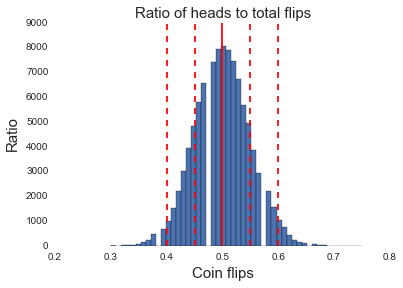

In [22]:
plt.hist(trials, bins=50)
plt.xlabel("Coin flips", fontsize=15)
plt.ylabel("Ratio", fontsize=15)
plt.title("Ratio of heads to total flips", fontsize=15)

ymin, ymax = plt.ylim()
mean = statistics.mean(trials)
stdev = statistics.stdev(trials)
plt.vlines(mean, ymin, ymax, color="red")
plt.vlines([mean - 2 * stdev, mean - stdev, mean + stdev, mean + 2 * stdev], ymin, ymax, linestyles="dashed", color="red")
plt.show()

In [23]:
def flip_ratio_1000(n=1000):
    head_count = 0
    tail_count = 0
    while n > 0:
        flip = flip_coin()
        if flip == "H":
            head_count += 1
        else:
            tail_count += 1
        n -= 1
    flip_ratio = head_count / 1000
    return flip_ratio

In [24]:
def trials_1000(num):
    results = [flip_ratio_1000() for i in range(num)]
    return results

In [25]:
trials2 = trials_1000(100000)

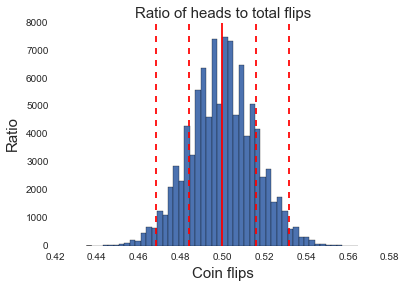

In [26]:
plt.hist(trials2, bins=50)
plt.xlabel("Coin flips", fontsize=15)
plt.ylabel("Ratio", fontsize=15)
plt.title("Ratio of heads to total flips", fontsize=15)

ymin, ymax = plt.ylim()
mean = statistics.mean(trials2)
stdev = statistics.stdev(trials2)
plt.vlines(mean, ymin, ymax, color="red")
plt.vlines([mean - 2 * stdev, mean - stdev, mean + stdev, mean + 2 * stdev], ymin, ymax, linestyles="dashed", color="red")
plt.show()

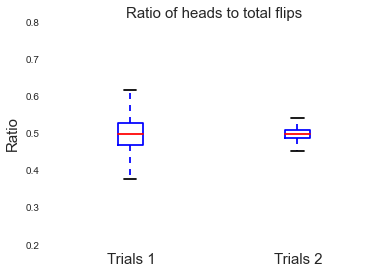

In [27]:
plt.boxplot([trials, trials2])
ymin, ymax = plt.ylim()
plt.ylim(ymin - .001, ymax + .001)
plt.title("Ratio of heads to total flips", fontsize=15)
plt.ylabel("Ratio", fontsize=15)
plt.xticks(range(1,3), ["Trials 1", "Trials 2"], fontsize=15)
plt.show()
